# Hist 3368 - Week 6 - Grouping Data

One of the reasons why we work with tabular data is that it makes it possible to aggregate information around features o the data.  For example, rather than counting the top words overall, we can compare the top words of each speaker.  Or rather than studying the words for crime overall, we can aggregate the top words for crime of each year and study how they change.

When we want to study how the facets of data affect count, we need to "group" the data.  Typically we "group" data by a column -- for example, year, or speaker -- and then we take a count of the words that result.

This Notebook offers an introduction to the **.groupby()** function in pandas. We will learn a few major commands applied to grouped data:
    
   * **.sum()** -- to add up grouped data
   * **.aggregate()** -- which has similar functions to .sum()



We will also learn some important features of the .groupby() grammar, including:
    
   * the use of **.copy()** to preserve data integrity when executing grouped transformations
   * the use of **.reset_index()** to renumber rows when working with grouped data
  

#### Load some packages and data

In [17]:
import datetime
import pandas as pd
import numpy as np
import csv
import glob

In [6]:
cd ~/digital-history

/users/jguldi/digital-history


In [8]:
congress = pd.read_csv("congress1967-2010.csv")

TROUBLESHOOTING: if the line above doesn't work, you might have missed something earlier this week.

In [9]:
congress.head()

Unnamed: 0                                             speech        date  \
0           0  Those who do not enjoy the privilege of the fl...  1967-01-10   
1           1  Mr. President. on the basis of an agreement re...  1967-01-10   
2           2  The Members of the Senate have heard the remar...  1967-01-10   
3           3  The Chair lays before the Senate the following...  1967-01-10   
4           4                                Secretary of State.  1967-01-10   

              speaker  word_count  year  month  month_year  
0  The VICE PRESIDENT          16  1967      1  1967-01-01  
1       Mr. MANSFIELD          35  1967      1  1967-01-01  
2  The VICE PRESIDENT          40  1967      1  1967-01-01  
3  The VICE PRESIDENT         151  1967      1  1967-01-01  
4  Mrs. AGNES BAGGETT           3  1967      1  1967-01-01

# The `groupby()` Method

Understanding how to group data is essential for performing a number of operations on pandas DataFrames. 

Groupby refers to a process involving one or more of the following steps: 
 - splitting the data into groups based on some criteria.
 - applying a function to each group independently.
 - combining the results into a data structure. 

The main takeaway is that with `groupby()` we can group categories and then apply functions to the categories instead of to the entire data set.

Before showing code examples of `groupby()` let's get a quick conceptual overview of what it means to perform a function to a category as opposed to the entire data set.

Consider the following image, a sample of the Hansard data. If we were to group this data by decade it would be as though we stuck each decade into a bucket to be operated upon independantly from the rest of the data.

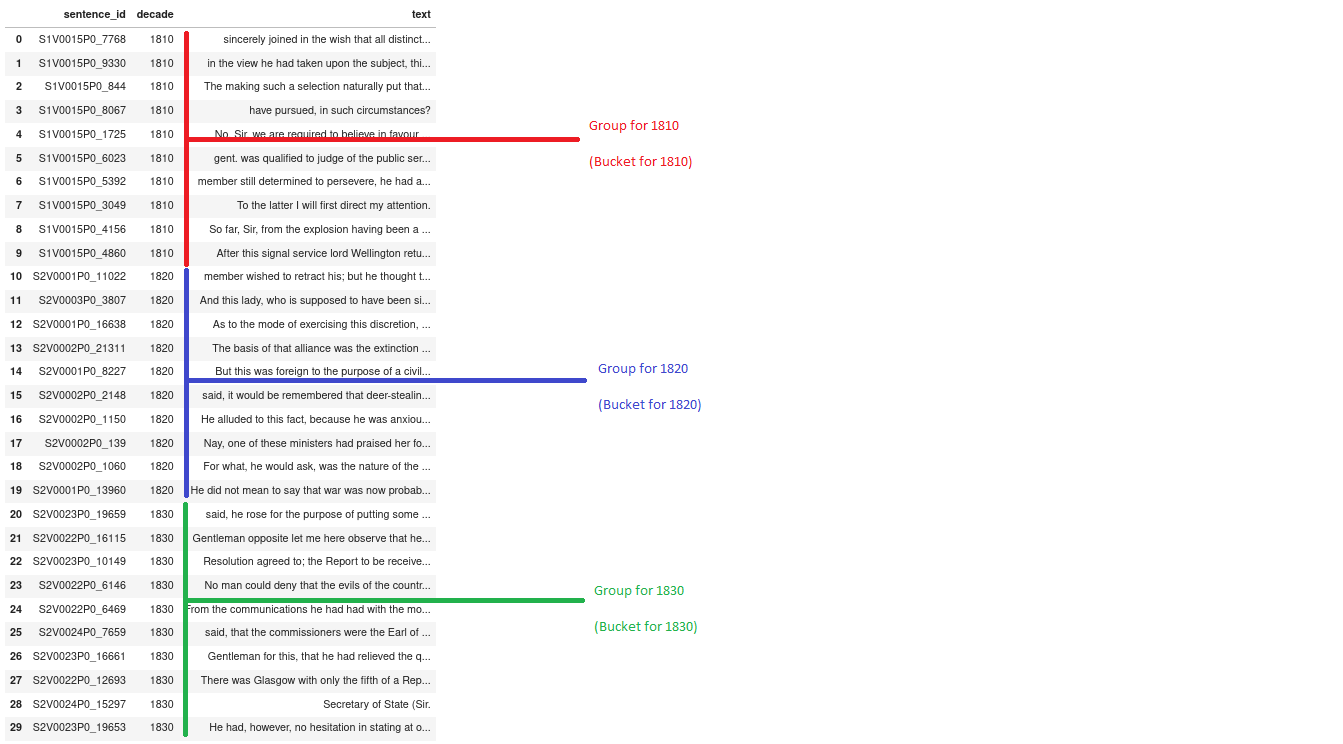

The following code example demonstrates this concept in action. During this example we will:

1. Count the number of words in each sentence of our Hansard sample
2. Group the data by decade
3. Sum the total number of words per each decade based on our sentence-level word counts

### Groupby in Action

Let me try to translate groupby() into plain English.  Imagine that I'm counting easter eggs.  I can count all of my eggs together, and I get one number.  

But what if I want to count all of the green eggs, the red eggs, and the yellow eggs, and have separate counts for each?  Let's say, to make things easy, I sort the eggs by color, putting each color of eggs into a unique basket.  Now I have a basked of red eggs, and if I count all of the eggs in the basket, I know how many red eggs there are. 

Groupby() is like having a series of baskets.  

Groupby() tells the computer to "group" your data by some variable (in the case of my example, you're "grouping" eggs by "color") before you apply any other function, for example, counting them.  

With groupby(), the computer can count all the words per date or words per speaker.

Without groupby(), all the computer knows how to do is to count everything -- like someone who can only count the total number of eggs, but not the number of red eggs and yellow eggs separately. 

---

Groupby() is a function that takes as its argument the column that you are grouping the data by.  

If we were counting eggs, we would groupby(['egg_color']).

Because we are counting words per month, we will group_by(['month_year']).

Notice please that the name of the column is in both brackets [] and single quotation marks ''.  The brackets tell Python that you are want part of the dataframe WHICH corresponds to an index.  The quotation marks tell Python that you want the column of the dataframe that corresponds to the string 'month_year.'

----

Groupby() is usually strung along with another command -- which tells Python what to do with the data once you group it. In this case, we want to total the number of words, so we will string together 

    .groupby().sum().

Groupby() is also typically followed by a command that says that Python should create a new database with the grouped data: 

    .copy().  
    
Without `.copy`, the new variable you create is actually a reference to the original data frame, not a new subset that just contains word_count. You don't need to understand why, but you should know that this convention will help your data to retain its integrity.  Use .groupby().sum().copy().

In [20]:
words_per_month_counts = congress.groupby(['month_year']).sum()
words_per_month_counts

Unnamed: 0  word_count      year   month
month_year                                           
1967-01-01     27073761     1188289  14475153    7359
1967-02-01    157620829     1704479  23330587   23722
1967-03-01    382392413     2127591  28438886   43374
1967-04-01    596582400     1967545  28649355   58260
1967-05-01    860305473     2073267  30254427   76905
...                 ...         ...       ...     ...
2010-08-01   9978100785      360153   3358710   13368
2010-09-01  42152570165     1336598  14178540   63486
2010-10-01    107626203         523     36180     180
2010-11-01  18163571157      665953   6104370   33407
2010-12-01  58602454218     2103020  19673880  117456

[498 rows x 4 columns]

If you're wondering what happened, you might scroll up to the last instance of the table and notice that there was already a word_count column that had the number of words in every speech.  There were many speeches per month_year.  

In the new word_count column, we have put all the speeches that happened in a single month_year into one basket.  For each basket, we have added together all of the word_count numbers from the individual speeches.  

The sum of all the word_count numbers is the number of words that were spoken in every month.

See for yourself -- look at the table above and notice that the word_count column numbers are around 100 words per speech.  Look at the word_count column in words_per_month_counts, and see that the word_count column is closer to 1 or 2 million in many cases.

We have grouped the data by month and taken a count.  .groupby().sum().copy().

--



Next, let's play with making our dataframe more elegant.

Let's say that we only want to look at one column here -- word_count.  

We use double backets to select the column from the dataframe, while keeping the data classified as a dataframe (not a series object), because dataframes are more flexible.  For more on dataframes and series objects, see  https://www.educative.io/edpresso/series-vs-dataframe-in-pandas. 

Again, you don't really need to know about dataframes vs. series objects, but you should remember that square brackets will be more flexible when we're working with tabular data in pandas.

In [21]:
just_counts = words_per_month_counts[['word_count']].copy() 
just_counts

word_count
month_year            
1967-01-01     1188289
1967-02-01     1704479
1967-03-01     2127591
1967-04-01     1967545
1967-05-01     2073267
...                ...
2010-08-01      360153
2010-09-01     1336598
2010-10-01         523
2010-11-01      665953
2010-12-01     2103020

[498 rows x 1 columns]

You'll notice that the month_year column is in bold.

By putting the month_year column in bold, pandas is telling us that it used the month_year column to "group" the other data.

Technically, the month_year column is an "index" -- we might also call it a 'grouping' or a 'label' -- not just another column of data.

But we're going to want to treat month_year like another kind of data soon.  We're going to want to put it on the x axis.  So we need to take month_year out of "index" format and make it into a column.  This process is called "resetting the index."  Again you don't need to know much about what's being done, but you need to notice that resetting the index can solve the problem of working with the data that was the "group" after you run a groupby() command.   

In [22]:
just_counts.reset_index(level=0, inplace=True)
display(just_counts)

month_year  word_count
0    1967-01-01     1188289
1    1967-02-01     1704479
2    1967-03-01     2127591
3    1967-04-01     1967545
4    1967-05-01     2073267
..          ...         ...
493  2010-08-01      360153
494  2010-09-01     1336598
495  2010-10-01         523
496  2010-11-01      665953
497  2010-12-01     2103020

[498 rows x 2 columns]

Just_counts is a dataframe grouped by month_year with column word_count.  It's perfect for showing change over time.

If we wanted to start the whole process over again, and count by year, we could do that by first extracting the year column. 

Then we'd groupby() year and sum() and copy().

In [36]:
just_counts['year'] = pd.to_datetime(just_counts['month_year']).dt.year # now we can make a column for just the year 

just_counts[:10]

month_year  word_count  year
0  1967-01-01     1188289  1967
1  1967-02-01     1704479  1967
2  1967-03-01     2127591  1967
3  1967-04-01     1967545  1967
4  1967-05-01     2073267  1967
5  1967-06-01     2465829  1967
6  1967-07-01     1842478  1967
7  1967-08-01     2818967  1967
8  1967-09-01     1711324  1967
9  1967-10-01     2286796  1967

What if we wanted to find the top words per year?

First, we'd make sure there was a year column in all_data.

In [33]:
congress['year'] = pd.to_datetime(congress['month_year']).dt.year 
congress[:10]

Unnamed: 0                                             speech        date  \
0           0  Those who do not enjoy the privilege of the fl...  1967-01-10   
1           1  Mr. President. on the basis of an agreement re...  1967-01-10   
2           2  The Members of the Senate have heard the remar...  1967-01-10   
3           3  The Chair lays before the Senate the following...  1967-01-10   
4           4                                Secretary of State.  1967-01-10   
5           5  The Senators to be sworn in will present thems...  1967-01-10   
6           6  (Edward E. Mansur) called the names of Mr. ALL...  1967-01-10   
7           7  Mr. President. I suggest the absence of a quorum.  1967-01-10   
8           8                      The clerk will call the roll.  1967-01-10   
9           9  I announce that the Senator from North Dakota ...  1967-01-10   

                 speaker  word_count  year  month  month_year  
0     The VICE PRESIDENT          16  1967      1  1967-01-01  
1          Mr. MANSFIELD          35  1967      1  1967-01-01  
2     The VICE PRESIDENT          40  1967      1  1967-01-01  
3     The VICE PRESIDENT         151  1967      1  1967-01-01  
4     Mrs. AGNES BAGGETT           3  1967      1  1967-01-01  
5     The VICE PRESIDENT          33  1967      1  1967-01-01  
6  The legislative clerk          65  1967      1  1967-01-01  
7          Mr. MANSFIELD           9  1967      1  1967-01-01  
8     The VICE PRESIDENT           6  1967      1  1967-01-01  
9  Mr. LONG of Louisiana          11  1967      1  1967-01-01

Then, we'd groupby().sum().copy() with the year column instead.  

We'd select just the word_count column, as before...

... and reset the index

In [32]:
word_per_year_counts = congress.groupby(['year']).sum().copy() 

per_year_counts = word_per_year_counts[['word_count']].copy()

per_year_counts.reset_index(level=0, inplace=True)

per_year_counts[:10]

year  word_count
0  1967    24253010
1  1968    18521991
2  1969    22273351
3  1970    24868513
4  1971    24167244
5  1972    20456708
6  1973    24114200
7  1974    23172052
8  1975    25245603
9  1976    20729040

Out of curiosity, what was the maximum number of words spoken in Congress per year?

In [27]:
max(per_year_counts['word_count'])

29212581

What if I want to know what year that was?  I can use .query(), and specify in the parentheses the factors I'm trying to match.  

In the brackets that follow, I can specify what column I want to look up.  

In [28]:
per_year_counts.query('word_count==29212581')['year']

28    1995
Name: year, dtype: int64

The following line does the same thing:

In [30]:
max(per_year_counts['word_count'])

29212581

The maximum number of words per year happened in 1995.

## Groupby() Speaker

Next, let's use groupby() to "group" by speakers in the Congress data, using the 'speaker' column.  

First, let's count how many times the word 'crime' appears in Congress.

In [50]:
congress['vocabcount'] = congress['speech'].str.count('crime')  # Create a new column for the count of the word democracydis
congress.nlargest(10, ['vocabcount'])

Unnamed: 0                                             speech  \
4987452     4987452  Mr. President. I listened carefully to the com...   
5847597     5847597  Mr. President. hate crimes harm innocent victi...   
4987418     4987418  Madam President. our Nations recent history ha...   
4329355     4329355  Mr. President. I might. in opening. say to the...   
3925236     3925236  Mr. President. who is the toughest kid on the ...   
4328312     4328312  Mr. President. I had occasion to preside over ...   
4012002     4012002  Mr. President. I thank my colleague from Hawai...   
583918       583918  Mr. President. I take the floor at this time t...   
2744529     2744529  Mr. President. I thank the distinguished Senat...   
4664296     4664296  Mr. Speaker. tonight I come to talk for a few ...   

               date                    speaker  word_count  year  month  \
4987452  2000-06-19                  Mr. HATCH        5393  2000      6   
5847597  2009-04-28                Mr. KENNEDY        2881  2009      4   
4987418  2000-06-19                  Mr. HATCH        3609  2000      6   
4329355  1994-08-25                  Mr. SMITH        6661  1994      8   
3925236  1991-06-20             Mr. METZENBAUM        3089  1991      6   
4328312  1994-08-22          vs. MOSELEY-BRAUN        6399  1994      8   
4012002  1992-03-03                 Mr.. BIDEN        3801  1992      3   
583918   1970-07-22  Mr. BYRD of West Virginia        7706  1970      7   
2744529  1982-09-30                 Mr. CHILES        4392  1982      9   
4664296  1997-06-17               Mr. McCOLLUM        7211  1997      6   

         month_year  democracy_count  vocab  vocabcount  
4987452  2000-06-01                0     99          99  
5847597  2009-04-01                0     90          90  
4987418  2000-06-01                0     82          82  
4329355  1994-08-01                0     80          80  
3925236  1991-06-01                0     76          76  
4328312  1994-08-01                0     72          72  
4012002  1992-03-01                0     71          71  
583918   1970-07-01                0     69          69  
2744529  1982-09-01                0     68          68  
4664296  1997-06-01                0     68          68

The speeches listed above have extraordinarily large numbers of mentions of the word 'crime' -- 99 mentions in Mr. Hatch's 2000 speech.  If we were interested in studying crime in Congress, these should be the first places we start reading.

#### Use .aggregate() to group and sum at the same time.

We'll use a new function with .groupby():

    .aggregate()
    
Aggregate is more flexible than .sum() in that it allows us to specify which column to "group by" and which column to "aggregate."  

In the case of speakers and words, we want to "group by" the speaker, and "aggregate" how many times overall each speaker invoked the word 'crime.'

The way we do this has a peculiar grammar that you'll simply need to memorize, take notes on, and/or cut and paste:

    .groupby().aggregate({‘new_column_name’: np.sum}) 
    
One advantage of this method is that you can string together multiple charges, each a pair of commands enclosed in curly brackets:

    .aggregate(
        {‘column_name1’: np.sum}
        {‘column_name2’: np.mean}
        )

For now, however, we're just going to ask the code to *group by* "speaker" and to *aggregate* a new per-speaker column called "vocabcount" where we count how many times each speaker mentioned democracy across all of their speeches.

In [60]:
congressgrouped = congress.groupby('speaker').aggregate({'vocabcount': np.sum})  # Sum the rows by democracy_count
topvocabspeakers = congressgrouped.nlargest(10, ['vocabcount'])
topvocabspeakers

vocabcount
speaker                   
Mr. BIDEN             5013
Mr. HATCH             4279
Mr. LEAHY             3646
Mr. KENNEDY           3148
Mr. PROXMIRE          2488
Mr. THURMOND          2085
Mr. SPECTER           2065
Mr. SMITH             1935
Mrs. FEINSTEIN        1606
Mr. McCLELLAN         1565

In [55]:
topvocabspeakers.index

Index(['Mr. BIDEN', 'Mr. HATCH', 'Mr. LEAHY', 'Mr. KENNEDY', 'Mr. PROXMIRE',
       'Mr. THURMOND', 'Mr. SPECTER', 'Mr. SMITH', 'Mrs. FEINSTEIN',
       'Mr. McCLELLAN'],
      dtype='object', name='speaker')

#### Navigate back to the top 5 longest speeches of a particular speaker

Let's play with the data some more.  

What if we want to get all the speeches by the speakers who spoke the most about crime?

Next, we'll return to the 1980s data in eighties_data, but find only the speeches where the name in the 'speaker' column matches the list called top_speaker.

In [61]:
top_speaker_speeches = congress[congress['speaker'].isin(topvocabspeakers.index)] # Filter for only this specific speaker's speeches
top_speaker_speeches 

Unnamed: 0                                             speech  \
887             887  Mr. President. today. I introduce for myself a...   
890             890    I am happy to yield to the Senator from Alaska.   
892             892  I thank the distinguished Senator from Alaska....   
894             894                                           I yield.   
896             896  The Senator from Oregon is already a cosponsor...   
...             ...                                                ...   
5991741     5991741  Mr. President. as we approach the end of anoth...   
5991751     5991751  Mr. President. next month marks the retirement...   
5991762     5991762  Mr. President. last year I introduced the Noti...   
5991821     5991821  Madam President. I rise today to discuss two p...   
5991822     5991822  I want to say a few words about one of the hig...   

               date         speaker  word_count  year  month  month_year  \
887      1967-01-11    Mr. PROXMIRE          30  1967      1  1967-01-01   
890      1967-01-11    Mr. PROXMIRE          10  1967      1  1967-01-01   
892      1967-01-11    Mr. PROXMIRE          81  1967      1  1967-01-01   
894      1967-01-11    Mr. PROXMIRE           2  1967      1  1967-01-01   
896      1967-01-11    Mr. PROXMIRE          19  1967      1  1967-01-01   
...             ...             ...         ...   ...    ...         ...   
5991741  2010-12-22       Mr. LEAHY         708  2010     12  2010-12-01   
5991751  2010-12-22  Mrs. FEINSTEIN         835  2010     12  2010-12-01   
5991762  2010-12-22     Mr. SPECTER         722  2010     12  2010-12-01   
5991821  2010-12-22  Mrs. FEINSTEIN        1154  2010     12  2010-12-01   
5991822  2010-12-22       Mr. LEAHY         706  2010     12  2010-12-01   

         democracy_count  vocab  vocabcount  
887                    0      0           0  
890                    0      0           0  
892                    0      0           0  
894                    0      0           0  
896                    0      0           0  
...                  ...    ...         ...  
5991741                0      0           0  
5991751                0      0           0  
5991762                0      0           0  
5991821                0      0           0  
5991822                0      1           1  

[173181 rows x 11 columns]

Next, let's use the function 

    .nlargest() 

to find the longest speeches by the size of the column 'word_count'.

In [65]:
longest_speeches = top_speaker_speeches.nlargest(n=10, columns=['vocabcount']) # Get the top 5 longest speeches by word_count
longest_speeches 

Unnamed: 0                                             speech  \
4987452     4987452  Mr. President. I listened carefully to the com...   
5847597     5847597  Mr. President. hate crimes harm innocent victi...   
4987418     4987418  Madam President. our Nations recent history ha...   
4329355     4329355  Mr. President. I might. in opening. say to the...   
5175846     5175846  Mr. President. let me begin on a point of comm...   
4861319     4861319  Mr. President. I am pleased that today the Sen...   
4017967     4017967  Mr. President. we are now back on the socalled...   
4220405     4220405  Let us take these one at a time. What can we d...   
4810852     4810852  Mr. President. today. joined by Senators DASCH...   
2548179     2548179  Mr. President. the bill that I have just sent ...   

               date      speaker  word_count  year  month  month_year  \
4987452  2000-06-19    Mr. HATCH        5393  2000      6  2000-06-01   
5847597  2009-04-28  Mr. KENNEDY        2881  2009      4  2009-04-01   
4987418  2000-06-19    Mr. HATCH        3609  2000      6  2000-06-01   
4329355  1994-08-25    Mr. SMITH        6661  1994      8  1994-08-01   
5175846  2002-06-10    Mr. HATCH        3269  2002      6  2002-06-01   
4861319  1999-05-11    Mr. HATCH        5647  1999      5  1999-05-01   
4017967  1992-03-19    Mr. BIDEN        8215  1992      3  1992-03-01   
4220405  1993-11-03    Mr. BIDEN        8099  1993     11  1993-11-01   
4810852  1998-09-16    Mr. LEAHY        3405  1998      9  1998-09-01   
2548179  1981-07-09    Mr. BIDEN        3608  1981      7  1981-07-01   

         democracy_count  vocab  vocabcount  
4987452                0     99          99  
5847597                0     90          90  
4987418                0     82          82  
4329355                0     80          80  
5175846                0     60          60  
4861319                0     58          58  
4017967                0     56          56  
4220405                0     55          55  
4810852                0     53          53  
2548179                0     52          52

Notice that this dataframe is similar tot he one we generated above -- with the speeches that mentioned the word 'crime' the most -- but this dataframe is confined to the list of top speakers about crime that we generated in a previous step.  This kind of iterative practice can be useful in refining your data.

If we were really interested in what was said about crime in Congress during the 1980s, this would be a great place to start reading -- the five longest speeches by the five individuals who talked the most about democracy.

# Assignment

1) Using groupby(), count the number of times per month that Mr. HATCH spoke about crime.  

2) Find the month in which Mr. HATCH spoke about crime the most.  Find the speech where he mentions crime the most in that month.

Take a screenshot of your code and the results.  Upload it to Canvas.